In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
current_all = pd.read_csv('C:/Users/qhrrl/CodeExamples/current_predict_2.2_all/current_2.2_all.csv')
current_all_with_label = pd.read_csv('C:/Users/qhrrl/CodeExamples/current_predict_2.2_all/current_2.2_all_with_label.csv')

In [3]:
current_all

,R_AbsMax,S_AbsMax,T_AbsMax,R_AbsMean,S_AbsMean,T_AbsMean,R_P2P,S_P2P,T_P2P,R_RMS,...,T_1x,R_2x,S_2x,T_2x,R_3x,S_3x,T_3x,R_4x,S_4x,T_4x
0,3.363281,3.163086,4.124023,2.028139,1.841477,2.231237,6.686523,6.206055,7.687500,2.256789,...,0.018254,3.351792,3.100697,3.696719,0.021505,0.020882,0.026651,0.026565,0.024807,0.023144
1,0.200195,0.200195,0.400391,0.000601,0.012032,0.307140,0.280273,0.240234,0.200195,0.008107,...,0.002284,0.000864,0.003155,0.002524,0.001310,0.003527,0.002177,0.001299,0.002767,0.002863
2,0.160156,0.240234,0.400391,0.000921,0.011771,0.306799,0.280273,0.280273,0.240234,0.010129,...,0.004107,0.001908,0.001736,0.003016,0.001227,0.002740,0.002817,0.001124,0.003745,0.004328
3,3.403320,3.083008,4.003906,2.068058,1.881215,2.207894,6.766602,6.045898,7.407227,2.295722,...,0.018774,3.444096,3.172200,3.672384,0.014972,0.016815,0.016825,0.023058,0.029118,0.027701
4,3.283203,3.042969,4.003906,2.045135,1.851146,2.218224,6.566406,5.925781,7.447266,2.267228,...,0.012330,3.287545,3.018571,3.573038,0.017420,0.012482,0.015383,0.024391,0.022549,0.024005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,3.523438,3.203125,4.003906,2.141890,1.943596,2.285510,6.926758,6.286133,7.527344,2.377195,...,0.010984,3.379123,3.110377,3.600503,0.015960,0.014646,0.016884,0.031626,0.035482,0.027879
1379,3.483398,3.123047,4.043945,2.123332,1.925899,2.283868,6.806641,6.206055,7.567383,2.355197,...,0.016915,3.467345,3.184167,3.731244,0.022519,0.019552,0.022902,0.021713,0.019000,0.016591
1380,3.523438,3.203125,4.124023,2.117446,1.927561,2.306170,6.966797,6.326172,7.727539,2.349307,...,0.014313,3.446241,3.181884,3.761559,0.013294,0.013762,0.014397,0.016597,0.013495,0.015821
1381,3.443359,3.163086,3.963867,2.137625,1.947800,2.261046,6.846680,6.206055,7.407227,2.373297,...,0.019409,3.625128,3.344273,3.830691,0.018181,0.020409,0.014109,0.021209,0.022930,0.016920


In [5]:
current_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   R_AbsMax    1383 non-null   float64
 1   S_AbsMax    1383 non-null   float64
 2   T_AbsMax    1383 non-null   float64
 3   R_AbsMean   1383 non-null   float64
 4   S_AbsMean   1383 non-null   float64
 5   T_AbsMean   1383 non-null   float64
 6   R_P2P       1383 non-null   float64
 7   S_P2P       1383 non-null   float64
 8   T_P2P       1383 non-null   float64
 9   R_RMS       1383 non-null   float64
 10  S_RMS       1383 non-null   float64
 11  T_RMS       1383 non-null   float64
 12  R_Skewness  1383 non-null   float64
 13  S_Skewness  1383 non-null   float64
 14  T_Skewness  1383 non-null   float64
 15  R_Kurtosis  1383 non-null   float64
 16  S_Kurtosis  1383 non-null   float64
 17  T_Kurtosis  1383 non-null   float64
 18  R_Crest     1383 non-null   float64
 19  S_Crest     1383 non-null  

In [6]:
current_all.describe()

,R_AbsMax,S_AbsMax,T_AbsMax,R_AbsMean,S_AbsMean,T_AbsMean,R_P2P,S_P2P,T_P2P,R_RMS,...,T_1x,R_2x,S_2x,T_2x,R_3x,S_3x,T_3x,R_4x,S_4x,T_4x
count,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,...,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000
mean,3.322547,3.065464,3.981151,2.025658,1.832587,2.214728,6.585601,6.008378,7.435280,2.258395,...,0.014290,3.225577,2.957093,3.513456,0.018896,0.017276,0.018961,0.031996,0.031394,0.031721
std,0.594921,0.533806,0.672782,0.380494,0.342010,0.361749,1.180893,1.077665,1.347526,0.420822,...,0.006529,0.788975,0.723384,0.860475,0.009986,0.009882,0.010736,0.025194,0.022580,0.025094
min,0.160156,0.200195,0.360352,0.000480,0.010150,0.297090,0.240234,0.240234,0.200195,0.006700,...,0.001173,0.000669,0.001232,0.001564,0.001092,0.002146,0.001473,0.000307,0.001168,0.001374
25%,3.363281,3.123047,4.003906,2.089999,1.882056,2.268113,6.686523,6.125977,7.527344,2.334509,...,0.010986,3.351846,3.070735,3.645305,0.013879,0.012127,0.013751,0.021251,0.021290,0.020951
50%,3.443359,3.163086,4.124023,2.103572,1.898352,2.289033,6.806641,6.206055,7.687500,2.347950,...,0.013078,3.406473,3.122366,3.720409,0.016354,0.015043,0.016485,0.026411,0.026328,0.025768
75%,3.483398,3.203125,4.164062,2.117606,1.916169,2.303647,6.886719,6.246094,7.807617,2.358985,...,0.016228,3.463459,3.171937,3.771332,0.020898,0.018536,0.020517,0.032004,0.031468,0.031312
max,5.885742,5.605469,6.606445,2.152280,1.953806,2.343166,11.050781,11.010742,11.771484,2.394946,...,0.072787,3.856539,3.526614,4.155895,0.075729,0.092302,0.098203,0.166168,0.156345,0.170392


<AxesSubplot:xlabel='LABEL', ylabel='count'>

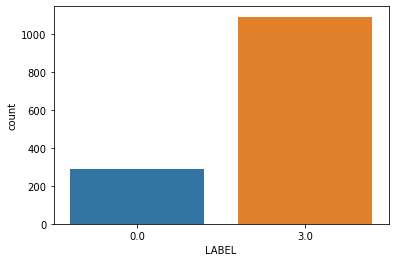

In [8]:
import seaborn as sns
sns.countplot(x='LABEL', data=current_all_with_label)

In [4]:
corr_current = current_all.corr()

In [5]:
corr_current

,R_AbsMax,S_AbsMax,T_AbsMax,R_AbsMean,S_AbsMean,T_AbsMean,R_P2P,S_P2P,T_P2P,R_RMS,...,T_1x,R_2x,S_2x,T_2x,R_3x,S_3x,T_3x,R_4x,S_4x,T_4x
R_AbsMax,1.000000,0.994142,0.989836,0.954844,0.953631,0.945186,0.999113,0.995879,0.989687,0.959878,...,0.399077,0.741282,0.739984,0.738284,0.320558,0.274981,0.314154,0.223525,0.215921,0.212780
S_AbsMax,0.994142,1.000000,0.989728,0.950357,0.950806,0.942429,0.994349,0.998964,0.988288,0.954847,...,0.408147,0.735122,0.735116,0.733943,0.321345,0.277271,0.316687,0.219939,0.215440,0.212579
T_AbsMax,0.989836,0.989728,1.000000,0.952639,0.950433,0.951569,0.990800,0.990820,0.998895,0.958146,...,0.385134,0.733015,0.731586,0.736977,0.315626,0.267508,0.309224,0.222642,0.213208,0.212647
R_AbsMean,0.954844,0.950357,0.952639,1.000000,0.999246,0.996969,0.959972,0.953805,0.958298,0.999575,...,0.241500,0.758088,0.757343,0.756628,0.232803,0.148205,0.192061,0.216052,0.199005,0.197023
S_AbsMean,0.953631,0.950806,0.950433,0.999246,1.000000,0.995896,0.958758,0.954101,0.955960,0.998552,...,0.244114,0.757369,0.757733,0.755720,0.231189,0.147171,0.190541,0.214707,0.198217,0.196033
T_AbsMean,0.945186,0.942429,0.951569,0.996969,0.995896,1.000000,0.950166,0.945951,0.956993,0.996114,...,0.226135,0.750753,0.750174,0.753515,0.222531,0.134062,0.179691,0.217741,0.198277,0.197519
R_P2P,0.999113,0.994349,0.990800,0.959972,0.958758,0.950166,1.000000,0.995849,0.991193,0.964945,...,0.390375,0.745089,0.743774,0.742040,0.318946,0.271462,0.311124,0.223063,0.215981,0.212832
S_P2P,0.995879,0.998964,0.990820,0.953805,0.954101,0.945951,0.995849,1.000000,0.989734,0.958277,...,0.404256,0.738182,0.738048,0.736922,0.320890,0.275239,0.315133,0.222554,0.216066,0.213075
T_P2P,0.989687,0.988288,0.998895,0.958298,0.955960,0.956993,0.991193,0.989734,1.000000,0.963857,...,0.372949,0.736845,0.735280,0.740604,0.313614,0.262462,0.305161,0.226668,0.216454,0.215371
R_RMS,0.959878,0.954847,0.958146,0.999575,0.998552,0.996114,0.964945,0.958277,0.963857,1.000000,...,0.253385,0.760326,0.759375,0.758940,0.239572,0.157792,0.201752,0.216503,0.200264,0.198183


<AxesSubplot:>

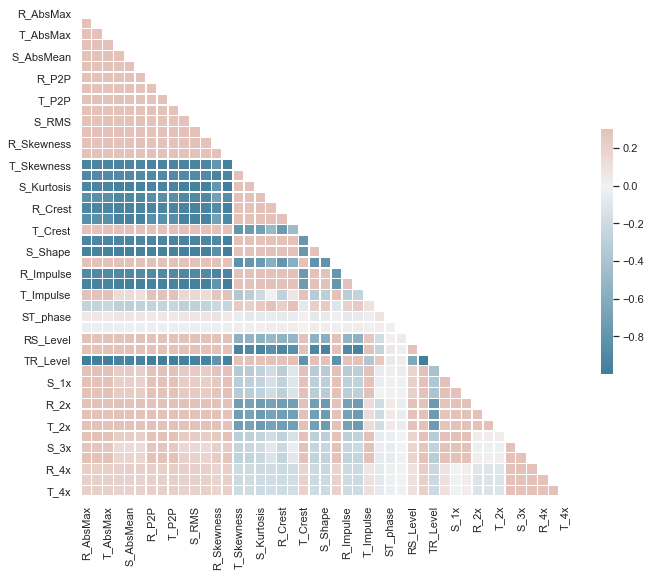

In [7]:
from string import ascii_letters
import seaborn as sns

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
# d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                  columns=list(ascii_letters[26:]))

# Compute the correlation matrix
# corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_current, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_current, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
type(current_all)

pandas.core.frame.DataFrame

In [10]:
current_fixed = current_all[
    [
        'R_AbsMax', 'S_AbsMax', 'T_AbsMax', 'R_AbsMean', 'S_AbsMean','T_AbsMean',
        'R_P2P', 'S_P2P', 'T_P2P', 'R_RMS', 'S_RMS', 'T_RMS', 
        'R_Skewness', 'S_Skewness','T_Crest', 'T_Shape', 'T_Impulse',
        'RS_phase', 'ST_phase', 'TR_phase', 'RS_Level', 'ST_Level', 
        'R_1x', 'S_1x', 'T_1x', 'R_2x', 'S_2x', 'T_2x',
        'R_3x', 'S_3x', 'T_3x', 'R_4x', 'S_4x', 'T_4x',
    ]
]

In [14]:
current_fixed.shape

(1383, 34)

In [15]:
corr_current_fixed.shape

(34, 34)

<AxesSubplot:>

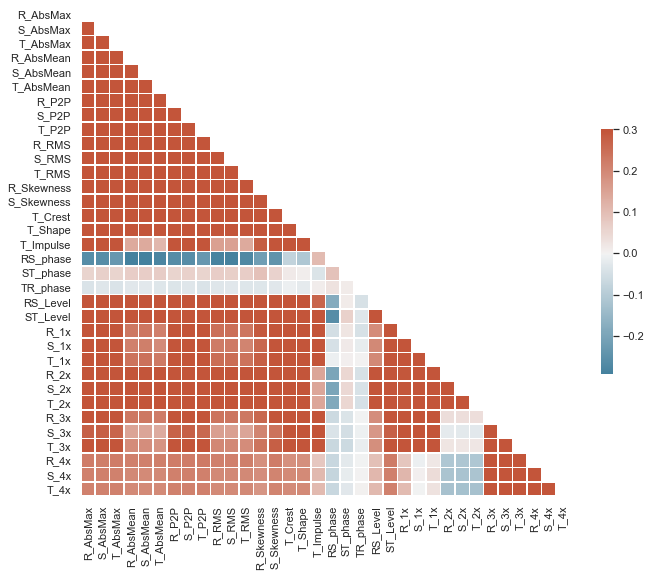

In [16]:
sns.set_theme(style="white")
corr_current_fixed = current_fixed.corr()

rs = np.random.RandomState(33)
mask = np.triu(np.ones_like(corr_current_fixed, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_current_fixed, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

통계 / 딥러닝 

In [17]:
current_fixed2 = current_fixed[
    [
        'R_AbsMax', 'S_AbsMax', 'T_AbsMax', 'R_AbsMean', 'S_AbsMean','T_AbsMean',
        'R_P2P', 'S_P2P', 'T_P2P', 'R_RMS', 'S_RMS', 'T_RMS', 
        'R_Skewness', 'S_Skewness','T_Crest', 'T_Shape', 'T_Impulse',
         'RS_Level', 'ST_Level', 
        'R_1x', 'S_1x', 'T_1x', 'R_2x', 'S_2x', 'T_2x',
        'R_3x', 'S_3x', 'T_3x', 'R_4x', 'S_4x', 'T_4x',
    ]
]

<AxesSubplot:>

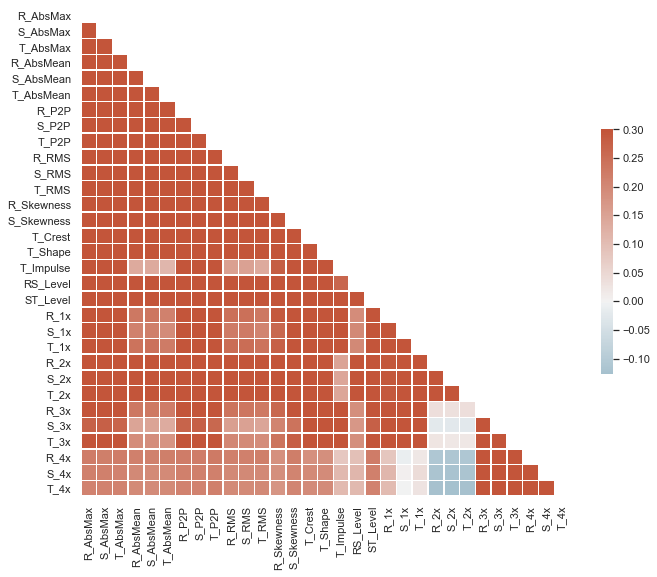

In [18]:
sns.set_theme(style="white")
corr_current_fixed2 = current_fixed2.corr()

rs = np.random.RandomState(33)
mask = np.triu(np.ones_like(corr_current_fixed2, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_current_fixed2, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [21]:
current_fixed3 = current_fixed2[
    [
        'R_AbsMax', 'S_AbsMax', 'T_AbsMax', 'R_AbsMean', 'S_AbsMean','T_AbsMean',
        'R_P2P', 'S_P2P', 'T_P2P', 'R_RMS', 'S_RMS', 'T_RMS', 
        'R_Skewness', 'S_Skewness','T_Crest', 'T_Shape', 'T_Impulse',
         'RS_Level', 'ST_Level', 
        'R_1x',
        'R_3x', 'S_3x', 'T_3x', 'R_4x', 'S_4x', 'T_4x',
    ]
]

<AxesSubplot:>

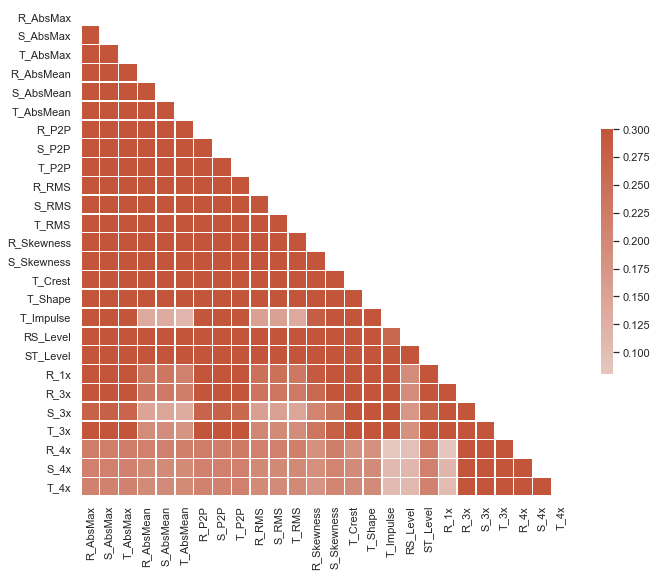

In [25]:
sns.set_theme(style="white")
corr_current_fixed3 = current_fixed3.corr()

rs = np.random.RandomState(33)
mask = np.triu(np.ones_like(corr_current_fixed3, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_current_fixed3, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# 1. CORR 높은애끼리 묶어봤다... 그럼 이제 얘가 들어가면 되는건가??

In [26]:
print(corr_current_fixed3)

            R_AbsMax  S_AbsMax  T_AbsMax  R_AbsMean  S_AbsMean  T_AbsMean  \
R_AbsMax    1.000000  0.994142  0.989836   0.954844   0.953631   0.945186   
S_AbsMax    0.994142  1.000000  0.989728   0.950357   0.950806   0.942429   
T_AbsMax    0.989836  0.989728  1.000000   0.952639   0.950433   0.951569   
R_AbsMean   0.954844  0.950357  0.952639   1.000000   0.999246   0.996969   
S_AbsMean   0.953631  0.950806  0.950433   0.999246   1.000000   0.995896   
T_AbsMean   0.945186  0.942429  0.951569   0.996969   0.995896   1.000000   
R_P2P       0.999113  0.994349  0.990800   0.959972   0.958758   0.950166   
S_P2P       0.995879  0.998964  0.990820   0.953805   0.954101   0.945951   
T_P2P       0.989687  0.988288  0.998895   0.958298   0.955960   0.956993   
R_RMS       0.959878  0.954847  0.958146   0.999575   0.998552   0.996114   
S_RMS       0.958635  0.955205  0.956765   0.999116   0.999518   0.995910   
T_RMS       0.951222  0.948292  0.959101   0.996355   0.995008   0.999336   

In [27]:
current_fixed3

,R_AbsMax,S_AbsMax,T_AbsMax,R_AbsMean,S_AbsMean,T_AbsMean,R_P2P,S_P2P,T_P2P,R_RMS,...,T_Impulse,RS_Level,ST_Level,R_1x,R_3x,S_3x,T_3x,R_4x,S_4x,T_4x
0,3.363281,3.163086,4.124023,2.028139,1.841477,2.231237,6.686523,6.206055,7.687500,2.256789,...,1.848313,0.250484,2.098482,0.019083,0.021505,0.020882,0.026651,0.026565,0.024807,0.023144
1,0.200195,0.200195,0.400391,0.000601,0.012032,0.307140,0.280273,0.240234,0.200195,0.008107,...,1.303611,0.028127,-0.947509,0.000912,0.001310,0.003527,0.002177,0.001299,0.002767,0.002863
2,0.160156,0.240234,0.400391,0.000921,0.011771,0.306799,0.280273,0.280273,0.240234,0.010129,...,1.305057,0.068547,-0.947890,0.001716,0.001227,0.002740,0.002817,0.001124,0.003745,0.004328
3,3.403320,3.083008,4.003906,2.068058,1.881215,2.207894,6.766602,6.045898,7.407227,2.295722,...,1.813450,0.411662,2.016743,0.015176,0.014972,0.016815,0.016825,0.023058,0.029118,0.027701
4,3.283203,3.042969,4.003906,2.045135,1.851146,2.218224,6.566406,5.925781,7.447266,2.267228,...,1.805005,0.368680,1.938506,0.011590,0.017420,0.012482,0.015383,0.024391,0.022549,0.024005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,3.523438,3.203125,4.003906,2.141890,1.943596,2.285510,6.926758,6.286133,7.527344,2.377195,...,1.751866,0.286980,2.139262,0.010672,0.015960,0.014646,0.016884,0.031626,0.035482,0.027879
1379,3.483398,3.123047,4.043945,2.123332,1.925899,2.283868,6.806641,6.206055,7.567383,2.355197,...,1.770656,0.209645,2.137300,0.014484,0.022519,0.019552,0.022902,0.021713,0.019000,0.016591
1380,3.523438,3.203125,4.124023,2.117446,1.927561,2.306170,6.966797,6.326172,7.727539,2.349307,...,1.788257,0.289983,2.178601,0.011859,0.013294,0.013762,0.014397,0.016597,0.013495,0.015821
1381,3.443359,3.163086,3.963867,2.137625,1.947800,2.261046,6.846680,6.206055,7.407227,2.373297,...,1.753112,0.325077,2.099383,0.020807,0.018181,0.020409,0.014109,0.021209,0.022930,0.016920


# 해당 corr 맵의 용도는 무엇인가?

In [33]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.collections import EllipseCollection

In [35]:
def plot_corr_ellipses(data, ax =None, **kwargs):

    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})
        ax.set_xlim(-0.5, M.shape[1] - 0.5)
        ax.set_ylim(-0.5, M.shape[0] - 0.5)

    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    w = np.ones_like(M).ravel()
    h = 1 - np.abs(M).ravel()
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

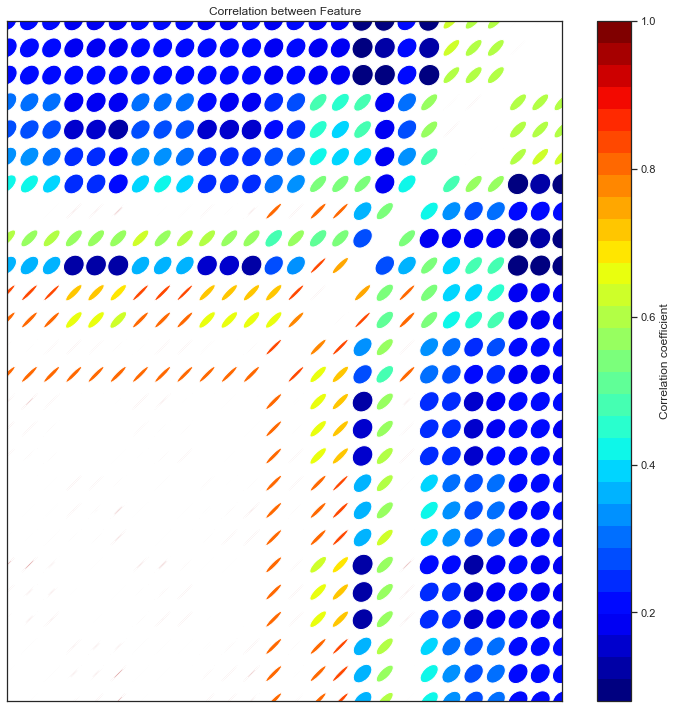

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cmap = cm.get_cmap('jet', 31)

m = plot_corr_ellipses(current_fixed3.corr(), ax=ax, cmap=cmap)
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')

plt.title('Correlation between Feature')

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.tight_layout()
plt.show()

# RMS 파악

In [28]:
RMS = current_fixed3[['R_RMS', 'S_RMS', 'T_RMS']]
RMS

,R_RMS,S_RMS,T_RMS
0,2.256789,2.088143,2.499746
1,0.008107,0.039444,0.307780
2,0.010129,0.039616,0.307490
3,2.295722,2.112329,2.459708
4,2.267228,2.081305,2.474634
...,...,...,...
1378,2.377195,2.184798,2.545332
1379,2.355197,2.161418,2.543949
1380,2.349307,2.165392,2.572312
1381,2.373297,2.188872,2.517988


In [46]:
mean_RMS = (current_fixed3['R_RMS'] + current_fixed3['S_RMS'] + current_fixed3['T_RMS']) / 3
mean_RMS

0       2.281559
1       0.118444
2       0.119078
3       2.289253
4       2.274389
          ...   
1378    2.369108
1379    2.353521
1380    2.362337
1381    2.360052
1382    2.370239
Length: 1383, dtype: float64

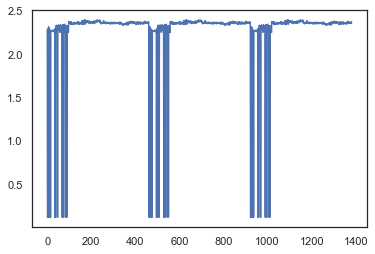

In [47]:
plt.plot(mean_RMS)

In [48]:
type(mean_RMS)

pandas.core.series.Series

In [51]:
mean_RMS_np = mean_RMS.to_numpy()

In [ ]:
mean_RMS_np_upper2 lambda x : x > 2.0

In [52]:
make_list = []
for i in mean_RMS:
    if i > 2.0:
        make_list.append(i)

In [53]:
len(make_list)

1332

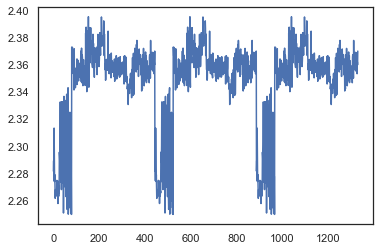

In [54]:
plt.plot(make_list)

In [55]:
make_list = []
for i in mean_RMS:
    if i > 2.3:
        make_list.append(i)

1173


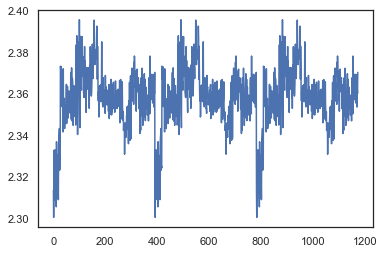

In [56]:
print(len(make_list))
plt.plot(make_list)